Example of a qubit encoding the $0$ state:

$$

|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}

$$

And $1$ state:

$$

|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}

$$

And Hadamard operation:

$$

H = \frac{1}{\sqrt{2}} \left( {\begin{array}{cc}
    1 & 1 \\
    1 & -1 \\
  \end{array} } \right)

$$

In [11]:
import numpy as np

ket0 = np.array([[1.0], [0.0]])

hadamard = np.dot(1/np.sqrt(2), np.array([[1.0, 1.0], [1.0, -1.0]]))

In [2]:
np.dot(hadamard, ket0)

array([[0.70710678],
       [0.70710678]])

Which is equivalend to the supperposition state

$$

|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)

$$

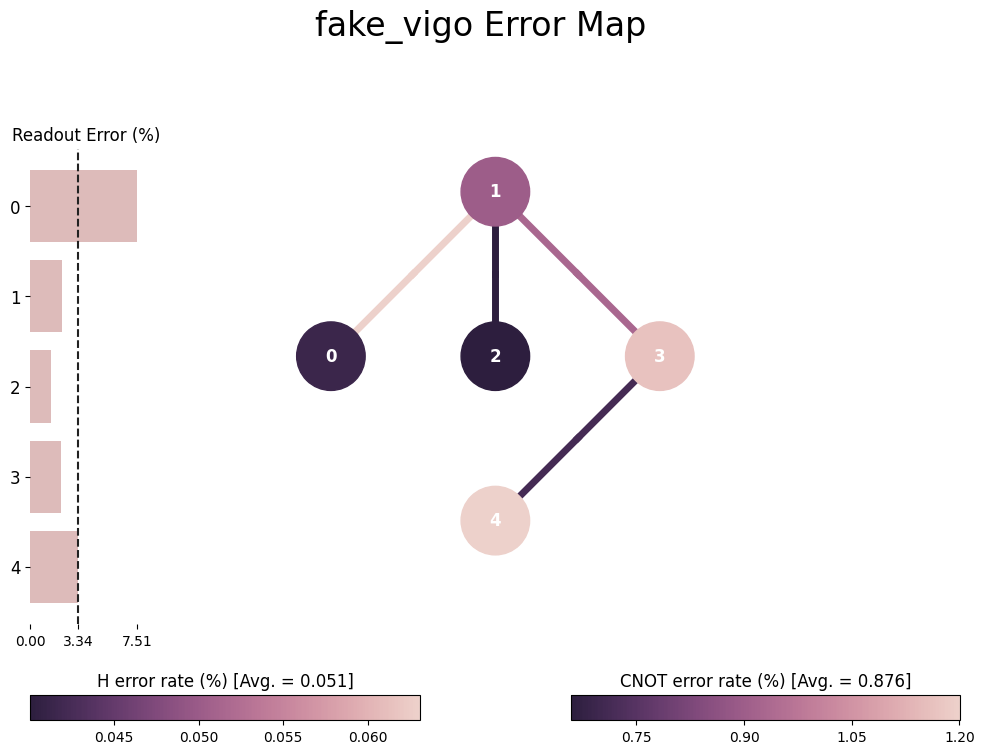

In [20]:
from qiskit.providers.fake_provider import FakeVigo
from qiskit.visualization import plot_error_map

emulator = FakeVigo()
plot_error_map(emulator)

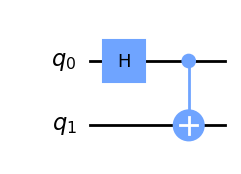

In [18]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

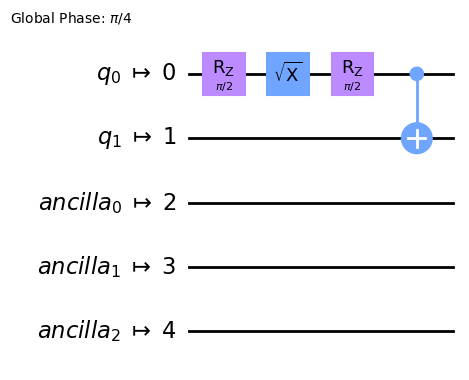

In [21]:
from qiskit import transpile

qc = transpile(qc, emulator)
qc.draw('mpl')

# Tensor networks

A simple example using Xanadu's Jet framework for quantum circuit simulation.

In [9]:
import jet

dim = [2]
ket0 = [1, 0]

# Initializing our qubits
qbit0 = jet.Tensor(["i"], dim, ket0)
qbit1 = jet.Tensor(["j"], dim, ket0)

In [12]:
Hadamard = jet.Tensor(["i", "k"], [2, 2], [1/np.sqrt(2), 1/np.sqrt(2), 1/np.sqrt(2), -1/np.sqrt(2)])
Hadamard

Size = 4
Indices = {i  k}
Data = {(0.707107,0)  (0.707107,0)  (0.707107,0)  (-0.707107,0)}

In [13]:
CNOT = jet.Tensor(["k", "j", "m", "n"], [2, 2, 2, 2])
CNOT.set_value((0, 0, 0, 0), 1) # |00> -> |00>
CNOT.set_value((0, 1, 0, 1), 1) # |01> -> |01>
CNOT.set_value((1, 0, 1, 1), 1) # |10> -> |11>
CNOT.set_value((1, 1, 1, 0), 1) # |11> -> |10>
CNOT

Size = 16
Indices = {k  j  m  n}
Data = {(1,0)  (0,0)  (0,0)  (0,0)  (0,0)  (1,0)  (0,0)  (0,0)  (0,0)  (0,0)  (0,0)  (1,0)  (0,0)  (0,0)  (1,0)  (0,0)}

In [16]:
tnet = jet.TensorNetwork()

tnet.add_tensor(qbit0)
tnet.add_tensor(Hadamard)
tnet.contract()

Size = 2
Indices = {k}
Data = {(0.707107,0)  (0.707107,0)}

In [17]:
tnet = jet.TensorNetwork()

tnet.add_tensor(qbit0)
tnet.add_tensor(qbit1)
tnet.add_tensor(Hadamard)
tnet.add_tensor(CNOT)

tnet.contract()

Size = 4
Indices = {m  n}
Data = {(0.707107,0)  (0,0)  (0,0)  (0.707107,0)}